In [1]:
import sys
import pandas as pd
import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble

In [2]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("../data/breast-cancer.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
print('Maligni: {}%\nBenigni: {}%'.format(357/569, 212/569))

Maligni: 0.6274165202108963%
Benigni: 0.37258347978910367%


In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
feature_names = [c for c in df.columns if c not in ["id", "diagnosis"]]
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)
X = np.array(df[feature_names].fillna(0))
y = np.array(df["diagnosis"])

In [10]:
df.drop(columns='Unnamed: 32', inplace=True)

In [11]:
df.shape

(569, 32)

# Mapper algoritam 3 dimenzije

In [12]:
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

In [13]:
mapper = km.KeplerMapper(verbose=3)
lens2 = mapper.fit_transform(X, projection="l2norm")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (569, 31)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))



In [14]:
lens = np.c_[lens1, lens2]

In [15]:
graph = mapper.map(lens,
                   X,
                   cover=km.Cover(n_cubes=15, perc_overlap=0.4),
                   clusterer=sklearn.cluster.KMeans(n_clusters=2,
                                                    random_state=1618033))

Mapping on data shaped (569, 31) using lens shaped (569, 2)

Minimal points in hypercube before clustering: 2
Creating 225 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

   > Found 2 clusters.

Cube_8 is empty.

Cube_9 is empty.

Cube_10 is empty.

Cube_11 is empty.

Cube_12 is empty.

   > Found 2 clusters.

Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

Cube_17 is empty.

Cube_18 is empty.

   > Found 2 clusters.

Cube_20 is empty.

Cube_21 is empty.

   > Found 2 clusters.

Cube_23 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_26 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_31 is empty.

Cube_32 is empty.

Cube_33 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_38 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 cl

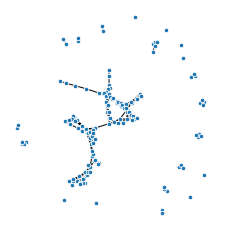

In [16]:
import matplotlib.pyplot as plt
km.draw_matplotlib(graph)
plt.show()

# Mapper algoritam 2 dim


In [17]:
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

In [18]:
mapper = km.KeplerMapper(verbose=2)
lens2 = mapper.fit_transform(X, projection="l2norm")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (569, 31)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))



In [19]:
lens = np.c_[lens1, lens2]

In [20]:
graph = mapper.map(lens,
                   X,
                   cover=km.Cover(n_cubes=15, perc_overlap=0.4),
                   clusterer=sklearn.cluster.KMeans(n_clusters=2,
                                                    random_state=1618033))

Mapping on data shaped (569, 31) using lens shaped (569, 2)

Minimal points in hypercube before clustering: 2
Creating 225 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

   > Found 2 clusters.

Cube_8 is empty.

Cube_9 is empty.

Cube_10 is empty.

Cube_11 is empty.

Cube_12 is empty.

   > Found 2 clusters.

Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

Cube_17 is empty.

Cube_18 is empty.

   > Found 2 clusters.

Cube_20 is empty.

Cube_21 is empty.

   > Found 2 clusters.

Cube_23 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_26 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_31 is empty.

Cube_32 is empty.

Cube_33 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_38 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 cl

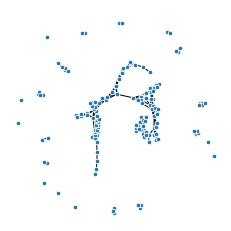

In [21]:
import matplotlib.pyplot as plt
km.draw_matplotlib(graph)
plt.show()

# TSNE 2 dimenzije (samo radi poredjenja rezultata)

In [22]:
from sklearn.manifold import TSNE

In [23]:
mdl = TSNE(perplexity=35, n_iter=10000)
X_transformed = mdl.fit_transform(X)
print(X_transformed)

[[  8.914709   48.265198 ]
 [ 11.208889   47.054394 ]
 [  9.733351   43.03015  ]
 ...
 [  3.0280962  27.003529 ]
 [ 10.273724   45.323013 ]
 [-12.28059   -52.856285 ]]


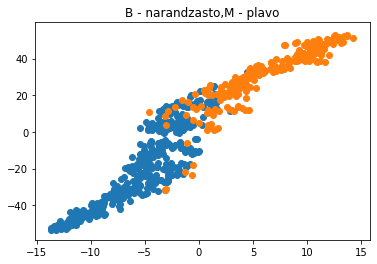

In [24]:
plt.title('B - narandzasto,M - plavo')
for i in range(2):
    plt.scatter(X_transformed[df['diagnosis'] == i, 0], X_transformed[df['diagnosis'] == i, 1])

# TSNE 3 dimenzije 

In [25]:
from mpl_toolkits.mplot3d import Axes3D

In [152]:
mdl = TSNE(n_components=3,perplexity=35, n_iter=5000)
X_transformed = mdl.fit_transform(X)
print(X_transformed)
X_transformed.shape

[[  4.2236342   -0.40483144 -12.125096  ]
 [  0.31356883  -4.5973897   14.946072  ]
 [  1.4076072   -3.1317818   14.627799  ]
 ...
 [ -4.323218     2.3739119   -3.5660095 ]
 [ -0.08820321  -5.5447717   14.743381  ]
 [ -8.234381   -10.324196    -2.95066   ]]


(569, 3)

/home/nina/.local/lib/python3.6/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


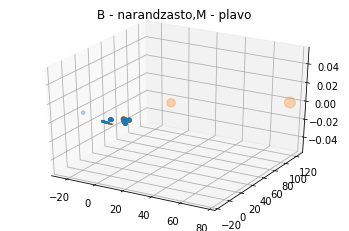

In [153]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('B - narandzasto,M - plavo')
for i in range(2):
    plt.scatter(X_transformed[df['diagnosis'] == i, 0], X_transformed[df['diagnosis'] == i, 1], X_transformed[df['diagnosis'] == i, 1] )
plt.savefig("cancer-tsne-reference.csv.png")
plt.show()

Procenjeni broj klastera: 6
Procenjeni broj tacaka koje predstavljaju sum: 3
Silhouette koeficijent: 0.638


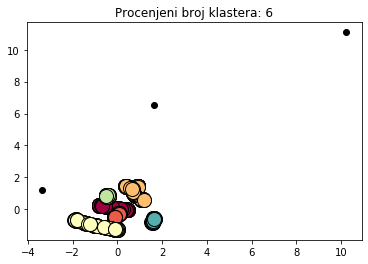

In [154]:
X = StandardScaler().fit_transform(X_transformed)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Procenjeni broj klastera: %d' % n_clusters_)
print('Procenjeni broj tacaka koje predstavljaju sum: %d' % n_noise_)
print("Silhouette koeficijent: %0.3f"
      % metrics.silhouette_score(X, labels))
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Procenjeni broj klastera: %d' % n_clusters_)
plt.show()

# Autoencoder 2 dimenzije

In [29]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.
/home/nina/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nina/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nina/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nina/.local/lib/python3.6/site-packages/tensorflow/python/framewo

In [30]:
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [31]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [101]:
df = pd.read_csv('../data/breast-cancer.csv')

In [102]:
feature_names = [c for c in df.columns if c not in ["id", "diagnosis"]]
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)

In [103]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

/home/nina/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/nina/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [104]:
X = np.array(df[feature_names].fillna(0))
y = np.array(df["diagnosis"])

In [105]:
X.shape

(569, 31)

In [106]:
input_dim = X.shape[1]
input_dim

31

In [107]:
encoding_dim = 2

In [108]:
input_layer = Input(shape=(input_dim, ))
encoder_layer_1 = Dense(500, activation="sigmoid", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder_layer_2 = Dense(450, activation="sigmoid")(encoder_layer_1)
encoder_layer_3 = Dense(encoding_dim, activation="sigmoid")(encoder_layer_2)

In [109]:
encoder = Model(inputs=input_layer, outputs=encoder_layer_3)

In [110]:
encoded_data = pd.DataFrame(encoder.predict(X))
encoded_data.columns = ['factor_1', 'factor_2']

In [111]:
joined = encoded_data.join(df["diagnosis"])

In [112]:
x1 = joined[joined['diagnosis'] == 1]
print(x1.shape)
x0 = joined[joined['diagnosis'] == 0]
print(x0.shape)

(212, 3)
(357, 3)


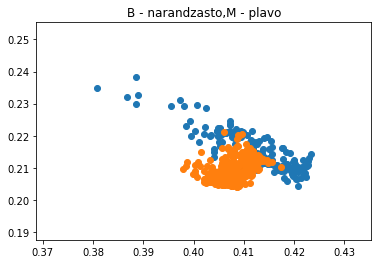

In [113]:
plt.title('B - narandzasto,M - plavo')
plt.scatter(x1['factor_1'], x1['factor_2'])
plt.scatter(x0['factor_1'], x0['factor_2'])

In [114]:
X = StandardScaler().fit_transform(encoded_data)

In [115]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [116]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Procenjeni broj klastera: %d' % n_clusters_)
print('Procenjeni broj tacaka koje predstavljaju sum: %d' % n_noise_)
print("Silhouette koeficijent: %0.3f"
      % metrics.silhouette_score(X, labels))

Procenjeni broj klastera: 2
Procenjeni broj tacaka koje predstavljaju sum: 82
Silhouette koeficijent: 0.322


In [117]:
from collections import Counter, defaultdict
print(Counter(db.labels_))

Counter({0: 460, -1: 82, 1: 27})


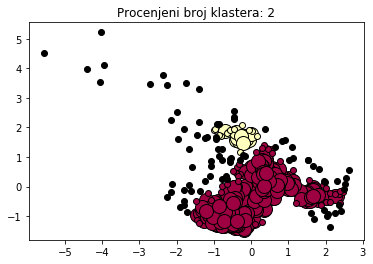

In [118]:

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Procenjeni broj klastera: %d' % n_clusters_)
plt.show()

# SOM 2 dimenzije

In [50]:
import matplotlib.pyplot as plt
from minisom import MiniSom

som = MiniSom(6, 6, 31, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
dff = df[feature_names].fillna(0)
som.train_random(dff.values, 100)

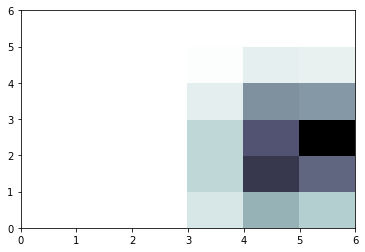

In [51]:
plt.pcolor(som.distance_map().T, cmap='bone_r')

# Autoencoder 3 dimenzije

In [52]:
df = pd.read_csv("../data/breast-cancer.csv")

In [53]:
feature_names = [c for c in df.columns if c not in ["id", "diagnosis"]]
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)
X = np.array(df[feature_names].fillna(0))
y = np.array(df["diagnosis"])

In [54]:
df.drop(columns='Unnamed: 32', inplace=True)

In [55]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

In [56]:
input_dim = X.shape[1]
input_dim

31

In [57]:
encoding_dim = 3

In [58]:
input_layer = Input(shape=(input_dim, ))
encoder_layer_1 = Dense(500, activation="sigmoid", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder_layer_2 = Dense(450, activation="sigmoid")(encoder_layer_1)
encoder_layer_3 = Dense(encoding_dim, activation="sigmoid")(encoder_layer_2)

In [59]:
encoder = Model(inputs=input_layer, outputs=encoder_layer_3)

In [60]:
encoded_data = pd.DataFrame(encoder.predict(X))
encoded_data.columns = ['factor_1', 'factor_2', 'factor_3']

In [61]:
joined = encoded_data.join(df["diagnosis"])

In [62]:
x1 = joined[joined['diagnosis'] == 1]
x0 = joined[joined['diagnosis'] == 0]

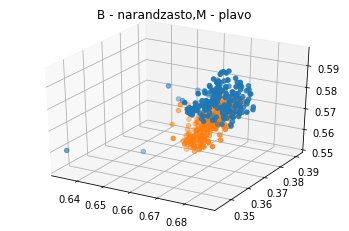

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('B - narandzasto,M - plavo')
ax.scatter(x1['factor_1'],x1['factor_2'],x1['factor_3'])
ax.scatter(x0['factor_1'],x0['factor_2'],x0['factor_3'])
plt.savefig("cancer3-reference.csv.png")
plt.show()

# DBSCAN Autoencoder 3 dim

In [64]:
X = StandardScaler().fit_transform(encoded_data)

In [97]:
db = DBSCAN(eps=0.4, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [98]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Procenjeni broj klastera: %d' % n_clusters_)
print('Procenjeni broj tacaka koje predstavljaju sum: %d' % n_noise_)
print("Silhouette koeficijent: %0.3f"
      % metrics.silhouette_score(X, labels))

Procenjeni broj klastera: 2
Procenjeni broj tacaka koje predstavljaju sum: 43
Silhouette koeficijent: 0.015


In [99]:
from collections import Counter, defaultdict
print(Counter(db.labels_))

Counter({0: 521, -1: 43, 1: 5})


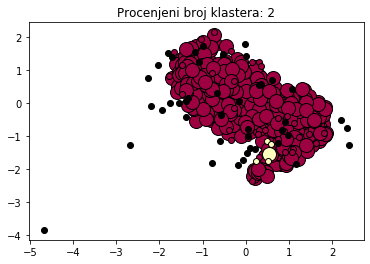

In [100]:

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Procenjeni broj klastera: %d' % n_clusters_)
plt.show()